# Customer package analysis in telecomuication company
## Introduction

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid packages, Surf and Ultimate. The advertising department wants to know which prepaid plan generates more revenue to adjust the advertising budget.
You will do an initial analysis of these prepaid plans based on a relatively small sample of clients. You will have data on 500 Megaline clients: who they are, where they are from, what type of plan they use, and the number of calls and messages they sent in 2018. Your task is to analyze client behavior and determine which prepaid plans bring in more income.

### Prepaid Package Description

Note: Megaline rounds seconds to minutes, and megabytes rounds to gigabytes. For calls, each individual call is rounded up: even if the call lasts only one second, it will count as one minute. For web traffic, each web session is not rounded up. However, the total for the month is rounded up. If a user spends 1025 megabytes this month, he will be charged for 2 gigabytes.

Surf
1. Monthly fee: $20

2. 500 minutes of call duration per month, 50 SMS, and 15 GB of data

3. After exceeding the package limit, will be charged:

1 minute: 3 cents

1 SMS: 3 cents

1GB of data: $10

ultimate
1. Monthly fee: $70

2. 3000 minutes of call duration per month, 1000 SMS, and 30 GB of data

3. After exceeding the package limit, will be charged:

1 minute: 1 cent

1 SMS: 1 cent

1GB of data: $7

### Stages of work:
1. Open the data file and review the general information
2. Pre-process data
3. Data Analysis
4. Hypothesis Test
5. Conclusion

Data Description

Table users (user data):

user_id — User ID

first_name — the user's first name

last_name — last name of the user

age — user's age (years)

reg_date — subscription start date (dd, mm, yy)

churn_date — the date the user stopped using the service (if the value is missing or not present, the service plan was in use when this data was generated)

city — the city where the user lives

plan — the name of the phone plan

Calls table (call data):

id — A unique web session ID

call_date — call date

duration — call duration (in minutes)

user_id — ID of the user making the call

Messages table (SMS data):

id — A unique SMS ID

message_date — the date the SMS was sent

user_id — ID of the user who sent the SMS

Internet table (web session data):

id — A unique web session ID

mb_used — the volume of data consumed during the session (in megabytes)

session_date — web session date

user_id — User ID

Table of plans (phone package data):

plan_name — the phone's package name

usd_monthly_fee — monthly fee in US dollars

minutes_included — monthly allocation of calling minutes

messages_included — monthly SMS allocation

mb_per_month_included — monthly data volume allocation (in megabytes)

usd_per_minute — price per minute if the package allocation limit has been exceeded (for example, if a package has an allocation of 100 minutes, then usage starting from the 101st minute will be charged)

usd_per_message — price per SMS if the package allocation limit has been exceeded

usd_per_gb — price per extra gigabyte of data if the package allocation limit has been exceeded (1 GB = 1024 megabytes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import math
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


1. No data lost
2. The call_date column data type is replaced with datetime
3. in the description there is a call = 0 seconds, will be reviewed

In [5]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


1. no data lost
2. session_date change the data type to datetime
3. mb_used value exists = 0 will be reviewed

In [7]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
messages.info()
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


1. complete data
2. data type message date with datetime

In [9]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
plans.info()
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


1. data looks good

In [11]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [12]:
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


1. Replace the data type reg_date with datetime
2. The churn date is the date you stop subscribing, so data that is not there is still subscribed, so data is not lost

2. ## Pre-processing Data


calls

change call_date data type to datetime

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = ('%Y-%m-%d'))

check the column sum 'duration' is 0

In [14]:
len(calls[calls['duration']==0])

26834

a value of 0 will not be deleted or changed, but a value of o will be marked as a missed call in the new column call_type

In [15]:
def call_type(x):
    if x == 0:
        return 'missed call'
    else:
        return 'connected call'

In [16]:
calls['call_type'] = calls['duration'].apply(call_type)

In [17]:
calls[calls['duration']==0].head()

,id,user_id,call_date,duration,call_type
19,1001_4,1001,2018-12-05,0.0,missed call
25,1001_13,1001,2018-12-24,0.0,missed call
31,1001_30,1001,2018-10-17,0.0,missed call
32,1001_31,1001,2018-11-03,0.0,missed call
34,1001_35,1001,2018-12-21,0.0,missed call


the 'duration' column with a decimal value will be rounded up and the type changed to integer

In [18]:
calls['duration'] = (np.ceil(calls['duration'])).astype(int)

To generate data on calls made and minutes used per month, month data is required, so a month column is created

In [19]:
calls['month'] = calls['call_date'].dt.month

In [20]:
calls.head()

,id,user_id,call_date,duration,call_type,month
0,1000_93,1000,2018-12-27,9,connected call,12
1,1000_145,1000,2018-12-27,14,connected call,12
2,1000_247,1000,2018-12-27,15,connected call,12
3,1000_309,1000,2018-12-28,6,connected call,12
4,1000_380,1000,2018-12-30,5,connected call,12


table of number of calls and minutes used

In [21]:
calls_mins_per_month = calls.groupby(['user_id', 'month']).agg({'id':'count', 'duration':'sum'}).rename(columns={'id':'call_made', 'duration':'mins_used'}).reset_index()
calls_mins_per_month.head()

,user_id,month,call_made,mins_used
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


internet

change the data type session_date to datetime

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format=('%Y-%m-%d'))

month data from internet usage will be made in the month column

In [23]:
internet['month'] = internet['session_date'].dt.month

data volume table per month

In [24]:
internet_vol_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index().rename(columns={'mb_used':'data_used'})
internet_vol_per_month.head()

,user_id,month,data_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


messages

change the message date data type to datetime

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format=('%Y-%m-%d'))

To get the number of messages per month, the month column is needed

In [26]:
messages['month'] = messages['message_date'].dt.month

table of the number of messages per month

In [27]:
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id':'message_used'})
messages_per_month.head()

,user_id,month,message_used
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


users

change the type reg_date to datetime

In [28]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

join all the data

In [29]:
big_data = pd.merge(calls_mins_per_month, internet_vol_per_month, how='outer', on=['user_id', 'month']).fillna(0)
big_data = pd.merge(big_data, messages_per_month, how='outer', on=['user_id', 'month']).fillna(0)
big_data = pd.merge(big_data, users, how='outer', on='user_id')
big_data = pd.merge(big_data, plans, how='left', left_on = 'plan', right_on = 'plan_name')
big_data.head()

,user_id,month,call_made,mins_used,data_used,message_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,16.0,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8.0,27.0,182.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2,1001,9.0,49.0,315.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
3,1001,10.0,65.0,393.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
4,1001,11.0,64.0,426.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


Calculate monthly income

because data prices are calculated per gigabytes, the data used is converted to gigabytes, which is 1024 mb

In [30]:
big_data['message_revenue'] = big_data.apply(lambda x: max(0, x['message_used'] - x['messages_included']) * x['usd_per_message'],axis = 1)
big_data['call_revenue'] =  big_data.apply(lambda x: max(0, x['mins_used'] - x['minutes_included']) * x['usd_per_minute'],axis = 1)
big_data['internet_revenue'] = big_data.apply(lambda x: np.ceil(max(0, x['data_used'] - x['mb_per_month_included'])/1024) * x['usd_per_gb'],axis = 1)
big_data['total_revenue'] = big_data['message_revenue'] + big_data['call_revenue'] + big_data['internet_revenue'] + big_data['usd_monthly_pay'] 


In [31]:
big_data.head()

,user_id,month,call_made,mins_used,data_used,message_used,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,message_revenue,call_revenue,internet_revenue,total_revenue
0,1000,12.0,16.0,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,0.0,70.00
1,1001,8.0,27.0,182.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,0.0,20.00
2,1001,9.0,49.0,315.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,0.0,20.00
3,1001,10.0,65.0,393.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.09,0.0,70.0,90.09
4,1001,11.0,64.0,426.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.00,0.0,40.0,60.00


In [32]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   month                  2293 non-null   float64       
 2   call_made              2293 non-null   float64       
 3   mins_used              2293 non-null   float64       
 4   data_used              2293 non-null   float64       
 5   message_used           2293 non-null   float64       
 6   first_name             2303 non-null   object        
 7   last_name              2303 non-null   object        
 8   age                    2303 non-null   int64         
 9   city                   2303 non-null   object        
 10  reg_date               2303 non-null   datetime64[ns]
 11  plan                   2303 non-null   object        
 12  churn_date             160 non-null    object        
 13  mes

In [67]:
simple_data.loc[simple_data['plan'] == 'surf', 'user_id'].count()


1579

In [68]:
simple_data.loc[simple_data['plan'] == 'ultimate', 'user_id'].count()


724

Make simple_data to make analysis easier

In [33]:
simple_data = pd.DataFrame(big_data, columns=['user_id', 'month', 'plan', 'total_revenue', 'call_made', 'mins_used', 'call_revenue', 'message_used', 'message_revenue', 'data_used', 'internet_revenue', 'city'])
simple_data.head()

,user_id,month,plan,total_revenue,call_made,mins_used,call_revenue,message_used,message_revenue,data_used,internet_revenue,city
0,1000,12.0,ultimate,70.00,16.0,124.0,0.0,11.0,0.00,1901.47,0.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,surf,20.00,27.0,182.0,0.0,30.0,0.00,6919.15,0.0,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,surf,20.00,49.0,315.0,0.0,44.0,0.00,13314.82,0.0,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,surf,90.09,65.0,393.0,0.0,53.0,0.09,22330.49,70.0,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,surf,60.00,64.0,426.0,0.0,36.0,0.00,18504.30,40.0,"Seattle-Tacoma-Bellevue, WA MSA"


3. Analisis data


To facilitate data analysis, it is divided into 2 according to the plan category

In [34]:
surf_user = simple_data[simple_data['plan']=='surf']
ultimate_user = simple_data[simple_data['plan']=='ultimate']

minutes

In [35]:
simple_data.groupby('plan')['mins_used'].agg([np.mean, np.var, np.std]).reset_index()

,plan,mean,var,std
0,surf,428.749523,54968.279461,234.453150
1,ultimate,430.450000,57844.464812,240.508762


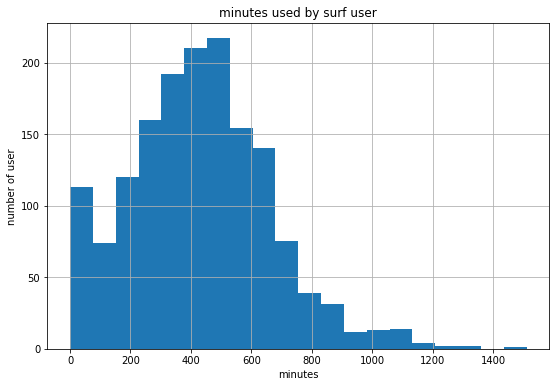

In [36]:
surf_user.hist('mins_used', bins=20, figsize=(9,6))
plt.title('minutes used by surf user')
plt.xlabel('minutes')
plt.ylabel('number of user')
plt.show()

the table of the number of minutes used by surf package users shows an average of 428 minutes of calling, still below the 500-minute quota

the variant and std deviation values of surf package users are also lower than ultimate which is normal, because the number of quotas is also smaller

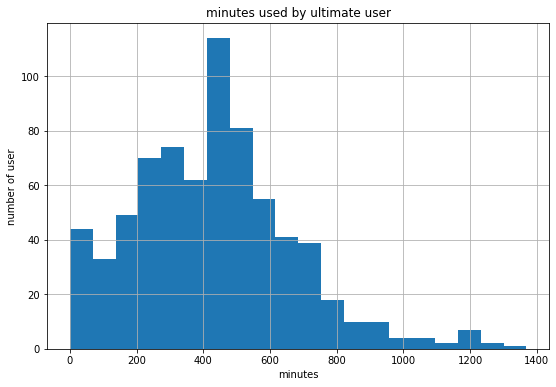

In [37]:
ultimate_user.hist('mins_used', bins=20, figsize=(9,6))
plt.title('minutes used by ultimate user')
plt.xlabel('minutes')
plt.ylabel('number of user')
plt.show()

the table of the number of minutes used by the ultimate package user shows an average of 430 minutes of calling, still very far below the 3000 minute quota, meaning that the ultimate package user does not choose the ultimate package to get a calling quota

the variance and std deviation values of surf package users are also slightly larger than surf which is normal, because the number of quotas is also greater

messages

In [38]:
simple_data.groupby('plan')['message_used'].agg([np.mean, np.var, np.std]).reset_index()

,plan,mean,var,std
0,surf,31.159568,1126.724522,33.566717
1,ultimate,37.551389,1208.756744,34.767179


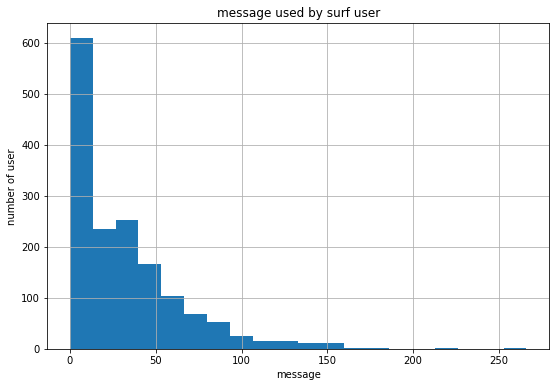

In [39]:
surf_user.hist('message_used', bins=20, figsize=(9,6))
plt.title('message used by surf user')
plt.xlabel('message')
plt.ylabel('number of user')
plt.show()

The message table used by Surf package users shows an average of 31 messages, with a larger variance than Ultimate package users. with a quota of 50 existing sms, it means that the messages used are not optimal, only a small number use more than 50 messages

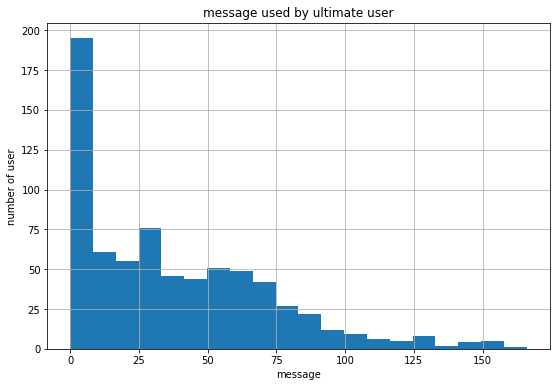

In [40]:
ultimate_user.hist('message_used', bins=20, figsize=(9,6))
plt.title('message used by ultimate user')
plt.xlabel('message')
plt.ylabel('number of user')
plt.show()

both the surf and ultimate packages the biggest is the number of messages of 0, which means that the message package is not the intention of the user to buy a package plan

internet

In [41]:
simple_data.groupby('plan')['data_used'].agg([np.mean, np.var, np.std]).reset_index()

,plan,mean,var,std
0,surf,16558.283490,6.421640e+07,8013.513327
1,ultimate,17214.699694,6.165229e+07,7851.897435


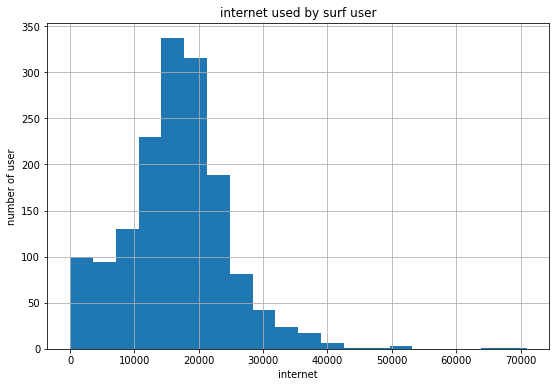

In [42]:
surf_user.hist('data_used', bins=20, figsize=(9,6))
plt.title('internet used by surf user')
plt.xlabel('internet')
plt.ylabel('number of user')
plt.show()

the internet table used by surf users shows an average of 16558, with a variance and std deviation that is greater than ultimate which means a greater distribution of data. with a 15GB quota, the average surf user uses more than the quota and provides more income for the company. The quota value that is used up and more indicates that the user chooses a plan based on the internet

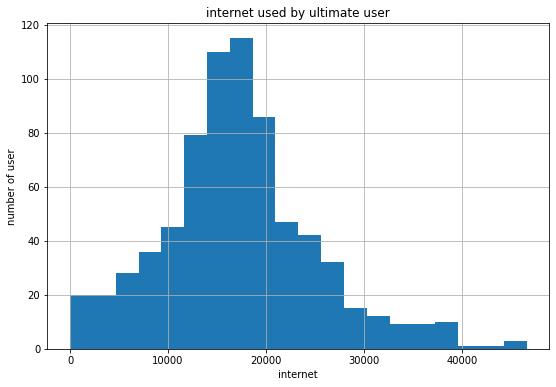

In [43]:
ultimate_user.hist('data_used', bins=20, figsize=(9,6))
plt.title('internet used by ultimate user')
plt.xlabel('internet')
plt.ylabel('number of user')
plt.show()

the ultimate user has a quota of 30gb, but only 17gb is still used on average so there is still a lot of quota left. there are few users who use more than 30 gb.

temporary conclusion of user behavior:
    
surfing:
1. Calls an average of 428 minutes per month
2. Average 31 messages per month
3. average internet 16558 mb per month
4. Of the three quotas, only internet is above the 15GB quota and provides additional income

ultimates:
1. Calls an average of 430 minutes per month
2. Average 37 messages per month
3. the average internet is 17214 mb per month and still below the 30 gb quota

4. ## hypothesis testing

hypothesis to be tested:
1. The average income of Ultimate and Surf phone package users is different.
2. The average income of users in the NY-NJ area is different from the income of users from other regions.

1. The average income of Ultimate and Surf phone package users is different.

H0:
revenue from Ultimate and Surf users SAME

H1:
revenue from Ultimate and Surf users DIFFERENT

alpha: 0.05

In [44]:
d_surf = surf_user['total_revenue']
d_ultimate = ultimate_user['total_revenue']
alpha = 0.05

In [45]:
results = st.ttest_ind(d_surf,d_ultimate,equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.2184115852123163e-15
We reject the null hypothesis


the results of the analysis show that H0 is rejected, which means that the income from ultimate and surf is DIFFERENT

2. The average income of users in the NY-NJ area is different from the income of users from other regions

H0:
revenue in NY and NJ is the same as other areas

H1:
income in NY and NJ to other areas DIFFERENT

alpha:0.05

In [55]:
city1 = simple_data.loc[simple_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_revenue']
city2 = simple_data.loc[simple_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_revenue']
alpha = 0.05

In [56]:
results = st.ttest_ind(city1,city2,equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.03870322661292944
We reject the null hypothesis


the results of the analysis show that H0 is rejected, so that the company's total revenue from the city of NY, NJ to other regions is DIFFERENT

## Final Conclusion:

The initial data is processed and obtained:
1. number of phone minutes used per month
2. number of messages used per month
3. the amount of internet data used per month
4. Total company revenue per month

The results of the analysis of consumer behavior are obtained:
Plan surf:
1. Calls an average of 428 minutes per month
2. Average 31 messages per month
3. average internet 16558 mb per month
4. Of the three quotas, only internet is above the 15GB quota and provides additional income

ultimate plan:
1. Calls an average of 430 minutes per month
2. Average 37 messages per month
3. the average internet is 17214 mb per month and still below the 30 gb quota
4. from behavior, consumers choose a package plan based on internet needs

Hypothesis Test Results:
1. Monthly income from Plan Surf and Plan Ultimate are different
2. Income per month from the city of NY and NJ with other cities is different